In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
FIG_SIZE = (5,4.5)
FONTSIZE = 16
LINESTYLE = (0,(4,4))
LINEWIDTH = 2.5
SAVE_FIG = False

data_tag = '20221104.week.tcp_avg_rtt'
rtt_filename = '../data/zoom/' + data_tag + '.csv'
max_rtt_thresh = 200 # msec

if (SAVE_FIG):
    out_dir = '../outputs/zoom/'
    if (not os.path.exists(out_dir)):
        os.mkdir(out_dir)

In [3]:
df = pd.read_csv(rtt_filename)

df['rtt_msec'] = df['TCP RTT'] * 1000
df.loc[df["rtt_msec"] > max_rtt_thresh, "rtt_msec"] = np.nan
df.loc[df["rtt_msec"] == 0, "rtt_msec"] = np.nan

df['ts_hr'] = df['Interval start'] / 3600
df['ts_day'] = df['ts_hr'] / 24

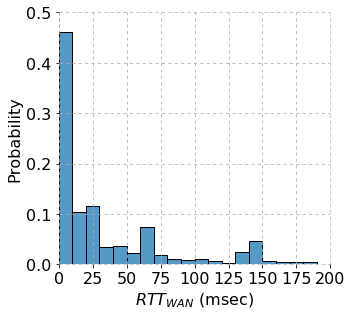

In [4]:
rtt_bins = range(0, max_rtt_thresh+1, 10)

plt.figure(figsize=FIG_SIZE)
sns.histplot(df.rtt_msec,stat="probability", bins=rtt_bins)

plt.ylabel('Probability', fontsize=FONTSIZE)
plt.xlabel('$RTT_{WAN}$ (msec)', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.ylim([0,.5])
plt.xlim([0,max_rtt_thresh])
plt.grid(linestyle =LINESTYLE)
plt.gca().spines["right"].set_linestyle(LINESTYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINESTYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_linestyle(LINESTYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig(out_dir + data_tag + '_pdf.pdf')

plt.show()

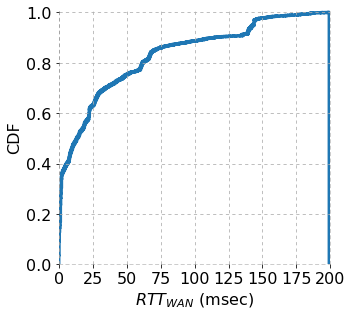

In [5]:
plt.figure(figsize=FIG_SIZE)
df['rtt_msec'].hist(cumulative=True, density=True, bins=1000, 
                    histtype = 'step', linewidth=3.5)

plt.ylabel('CDF', fontsize=FONTSIZE)
plt.xlabel('$RTT_{WAN}$ (msec)', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.ylim([0, 1.01])
plt.xlim([0, max_rtt_thresh])
plt.grid(linestyle =LINESTYLE)
plt.gca().spines["right"].set_linestyle(LINESTYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINESTYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_linestyle(LINESTYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig(out_dir + data_tag + '_cdf.pdf')

plt.show()

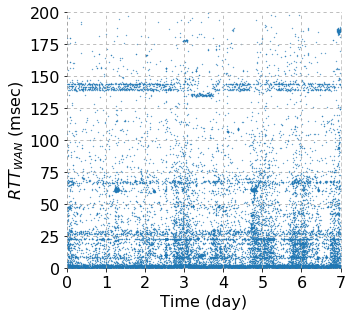

In [6]:
df.plot(x='ts_day', y='rtt_msec', kind='scatter', s=0.1, figsize=FIG_SIZE)

plt.ylabel('$RTT_{WAN}$ (msec)', fontsize=FONTSIZE)
plt.xlabel('Time (day)', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.ylim([0, max_rtt_thresh])
plt.xlim([0, 7])
plt.grid(linestyle =LINESTYLE)
plt.gca().spines["right"].set_linestyle(LINESTYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINESTYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_linestyle(LINESTYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig(out_dir + data_tag + '.pdf')

plt.show()